In [3]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline
data = pd.read_excel (r'2Proband2.xlsx') 
df= pd.DataFrame(data, columns=['PupilLeft','PupilRight', 'StudioEventTypeDiff'])
df = df.loc[df['StudioEventTypeDiff'] == 'Agree_2_Skimming']
#df = pd.DataFrame(data, columns= ['PupilLeft','PupilRight'])
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True )
print(df)
#with open('Skimming_All.xlsx', 'a') as f:
#    df.to_csv(f, header=False)
#df.to_excel('skimming_all.xlsx')
print('Copying done')
#df['PupilLeft'].str.replace(',','-')
#pupilleft = df['PupilLeft']
#pupilright = df['PupilRight']
#pupilleft = pupilleft.str.replace(',','.').astype(float)
#pupilright = pupilright.str.replace(',','.').astype(float)
#print(pupilleft)
#print(pupilright)
#pupilleft, pupilright = np.array(pupilleft), np.array(pupilright) 
#mean = (pupilleft + pupilright)/2;

#pyplot.hist(pupilleft, bins=200)
#pyplot.hist(pupilright,bins=100)
#print (mean)
#print("scanning histogram")
#pyplot.hist(mean, bins=200)
#pyplot.show()

      PupilLeft PupilRight StudioEventTypeDiff
1858       3,48       3,53    Agree_2_Skimming
1859       3,51       3,55    Agree_2_Skimming
1860       3,51       3,58    Agree_2_Skimming
1861       3,49       3,50    Agree_2_Skimming
1862       3,53       3,53    Agree_2_Skimming
1863       3,50       3,55    Agree_2_Skimming
1864       3,51       3,60    Agree_2_Skimming
1865       3,52       3,59    Agree_2_Skimming
1866       3,52       3,59    Agree_2_Skimming
1867       3,53       3,61    Agree_2_Skimming
1868       3,51       3,59    Agree_2_Skimming
1869       3,53       3,57    Agree_2_Skimming
1870       3,51       3,54    Agree_2_Skimming
1871       3,52       3,57    Agree_2_Skimming
1872       3,51       3,55    Agree_2_Skimming
1873       3,51       3,57    Agree_2_Skimming
1874       3,50       3,54    Agree_2_Skimming
1875       3,47       3,54    Agree_2_Skimming
1876       3,47       3,52    Agree_2_Skimming
1877       3,46       3,50    Agree_2_Skimming
1878       3,

In [65]:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    import pandas as pd

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist 
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()
    
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline
data = pd.read_excel (r'16Proband16.xlsx') 
df= pd.DataFrame(data, columns=['PupilLeft','PupilRight', 'StudioEventTypeDiff'])
df = df.loc[df['StudioEventTypeDiff'] == 'Agree_5_Unknown']
#df = pd.DataFrame(data, columns= ['PupilLeft','PupilRight'])
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True )
print(df)
append_df_to_excel('unknown_all.xlsx', df)
print('copying done')

      PupilLeft PupilRight StudioEventTypeDiff
677        3,06       3,24     Agree_5_Unknown
678        3,09       3,24     Agree_5_Unknown
679        3,13       3,28     Agree_5_Unknown
680        3,09       3,28     Agree_5_Unknown
681        3,01       3,23     Agree_5_Unknown
682        3,06       3,26     Agree_5_Unknown
683        3,03       3,27     Agree_5_Unknown
684        3,13       3,27     Agree_5_Unknown
685        3,05       3,28     Agree_5_Unknown
686        3,17       3,31     Agree_5_Unknown
687        3,13       3,31     Agree_5_Unknown
688        3,18       3,35     Agree_5_Unknown
689        3,14       3,32     Agree_5_Unknown
690        3,10       3,34     Agree_5_Unknown
692        3,11       3,36     Agree_5_Unknown
693        3,14       3,37     Agree_5_Unknown
694        3,16       3,36     Agree_5_Unknown
695        3,14       3,36     Agree_5_Unknown
696        3,14       3,38     Agree_5_Unknown
697        3,16       3,37     Agree_5_Unknown
698        3,

3.23 3.13
3.22 3.14
3.20 3.13
3.25 3.15
3.21 3.14
3.24 3.15
3.23 3.13
3.24 3.16
3.21 3.10
3.23 2.88
3.23 2.60
3.28 3.05
3.21 3.18
3.25 3.15
3.21 3.24
3.25 3.22
3.26 3.21
3.22 3.18
3.23 3.16
3.30 3.22
3.20 3.18
3.21 3.19
3.22 3.16
3.21 3.20
3.23 3.18
3.16 3.16
3.20 3.13
3.21 3.14
3.20 3.17
3.16 3.16
3.16 3.15
3.20 3.16
3.20 3.18
3.19 3.15
3.16 3.13
3.21 3.15
3.20 3.21
3.18 3.18
3.22 3.18
3.23 3.19
3.18 3.15
3.20 3.18
3.24 3.22
3.21 3.23
3.10 3.20
3.19 3.17
3.19 3.24
3.19 3.21
3.26 3.17
3.25 3.24
3.21 3.23
3.25 3.23
3.23 3.26
3.23 3.20
3.20 3.23
3.24 3.22
3.26 3.23
3.22 3.25
3.23 3.22
3.28 3.19
3.23 3.26
3.19 3.21
3.22 3.21
3.20 3.19
3.22 3.16
3.24 3.17
3.19 3.22
3.22 3.23
3.22 3.21
3.20 3.20
3.24 3.20
3.23 3.18
3.23 3.26
3.24 3.23
3.23 3.20
3.26 3.24
3.24 3.26
3.23 3.26
3.20 3.19
3.24 3.21
3.21 3.19
3.27 3.24
3.25 3.21
3.22 3.23
3.26 3.21
3.24 3.24
3.25 3.21
3.24 3.21
3.25 3.22
3.26 3.23
3.25 3.25
3.19 3.26
3.19 3.23
3.21 3.24
3.20 3.21
3.24 3.26
3.19 3.22
3.23 3.23
3.21 3.23
3.20 3.23


3.16 3.19
3.17 3.20
3.16 3.20
3.20 3.20
3.20 3.20
3.18 3.19
3.21 3.17
3.15 3.20
3.15 3.13
3.20 3.17
3.17 3.21
3.20 3.20
3.14 3.15
3.16 3.16
3.15 3.14
3.17 3.13
3.16 3.21
3.13 3.12
3.15 3.14
3.18 3.18
3.26 3.15
3.19 3.16
3.17 3.15
3.27 3.18
3.19 3.18
3.13 3.19
3.26 3.16
3.16 3.15
3.20 3.22
3.18 3.19
3.19 3.19
3.16 3.21
3.19 3.18
3.15 3.22
2.89 3.20
3.17 3.20
3.13 3.20
3.15 3.20
3.17 3.22
3.17 3.22
3.15 3.23
3.17 3.25
3.23 3.34
3.14 3.22
3.05 3.08
3.06 3.10
3.04 3.13
3.02 3.08
3.08 3.10
3.08 3.09
3.07 3.10
3.06 3.12
3.05 3.07
3.06 3.07
3.05 3.09
3.06 3.08
3.02 3.05
3.03 3.08
3.05 3.05
3.07 3.09
3.04 3.10
3.03 3.10
3.03 3.04
2.98 3.09
3.04 3.06
3.02 3.03
3.02 3.03
3.04 3.04
3.03 3.06
3.02 3.11
3.05 3.08
3.02 3.03
3.04 3.05
3.03 3.09
3.01 3.04
3.06 3.07
3.04 3.03
3.02 3.04
3.04 3.08
3.03 3.06
3.07 3.12
3.04 3.07
3.03 3.05
3.09 3.10
3.04 3.09
3.03 3.08
3.01 3.12
3.01 3.10
3.03 3.11
3.05 3.06
3.05 3.12
3.06 3.08
3.04 3.02
3.02 3.11
3.04 3.07
3.04 3.04
3.06 3.07
3.04 3.10
3.06 3.10
3.08 3.07


3.07 3.11
3.05 3.10
3.11 3.10
3.07 3.09
3.12 3.16
3.07 3.08
3.01 3.07
3.07 3.06
3.05 3.06
3.04 3.07
3.02 3.05
3.02 3.04
3.01 3.03
3.03 3.06
3.06 3.10
3.06 3.09
3.01 3.06
3.00 3.05
3.01 3.07
3.05 3.06
2.98 3.07
3.01 3.05
3.03 3.10
3.02 3.06
3.01 3.05
3.02 3.04
3.04 3.06
3.02 3.07
3.03 3.11
3.04 3.07
3.05 3.08
3.03 3.12
3.07 3.11
3.12 3.11
3.14 3.12
3.07 3.12
3.10 3.13
3.09 3.12
3.09 3.13
3.08 3.16
3.06 3.12
3.04 3.13
3.06 3.12
3.06 3.15
3.06 3.11
3.12 3.14
3.06 3.09
3.03 3.11
3.08 3.10
3.11 3.10
3.07 3.14
3.07 3.08
3.06 3.08
3.08 3.12
3.09 3.12
3.08 3.15
3.12 3.10
3.13 3.15
3.06 3.14
3.08 3.14
3.14 3.15
3.19 3.17
3.14 3.17
3.11 3.17
3.13 3.16
3.13 3.11
3.17 3.15
3.16 3.18
3.12 3.16
3.13 3.13
3.16 3.14
3.17 3.18
3.16 3.15
3.15 3.17
3.15 3.20
3.17 3.17
3.18 3.16
3.19 3.20
3.14 3.19
3.18 3.20
3.19 3.20
3.18 3.24
3.19 3.22
3.21 3.24
3.17 3.27
3.18 3.23
3.20 3.27
3.20 3.28
3.23 3.28
3.20 3.28
3.22 3.32
3.18 3.28
3.23 3.31
3.22 3.30
3.23 3.27
3.21 3.29
3.21 3.30
3.23 3.28
3.23 3.28
3.24 3.27


2.87 2.85
2.93 2.86
2.90 2.86
2.96 2.88
2.93 2.81
2.93 2.83
2.89 2.88
2.89 2.85
2.90 2.87
2.95 2.84
2.90 2.80
2.92 2.88
2.95 2.85
2.94 2.84
2.96 2.84
2.95 2.84
2.90 2.87
2.94 2.86
2.95 2.83
2.89 2.86
2.96 2.86
2.88 2.86
2.92 2.89
2.94 2.86
2.92 2.83
2.98 2.85
2.91 2.82
2.92 2.87
2.94 2.83
2.94 2.90
2.95 2.87
2.96 2.89
2.91 2.86
2.90 2.86
2.94 2.81
2.90 2.81
2.95 2.82
2.92 2.87
2.97 2.88
2.93 2.88
2.92 2.85
2.92 2.87
2.90 2.87
2.89 2.85
2.96 2.85
2.87 2.85
2.91 2.85
2.85 2.85
2.90 2.92
2.86 2.80
2.87 2.82
2.86 2.81
2.89 2.83
2.84 2.83
2.83 2.85
2.86 2.79
2.90 2.87
2.93 2.83
2.87 2.80
2.85 2.83
2.90 2.84
2.91 2.78
2.89 2.83
2.82 2.85
2.89 2.81
2.89 2.85
2.88 2.81
2.89 2.79
2.87 2.86
2.92 2.86
2.86 2.82
2.88 2.80
2.92 2.85
2.88 2.83
2.86 2.87
2.91 2.82
2.88 2.84
2.87 2.87
2.85 2.81
2.89 2.87
2.89 2.84
2.83 2.85
2.87 2.85
2.82 2.87
2.83 2.83
2.87 2.83
2.82 2.83
2.82 2.84
2.85 2.89
2.90 2.82
2.92 2.83
2.85 2.85
2.83 2.84
2.82 2.79
2.84 2.84
2.82 2.85
2.86 2.84
2.83 2.83
2.88 2.84
2.87 2.83


3.15 3.14
3.13 3.16
3.10 3.16
3.13 3.15
3.14 3.19
3.14 3.17
3.11 3.21
3.14 3.19
3.11 3.18
3.14 3.18
3.14 3.17
3.15 3.20
3.15 3.19
3.12 3.19
3.13 3.18
3.16 3.19
3.10 3.21
3.13 3.20
3.13 3.23
3.14 3.23
3.12 3.20
3.13 3.24
3.13 3.20
3.13 3.20
3.11 3.22
3.13 3.23
3.11 3.19
3.12 3.18
3.15 3.19
3.09 3.21
3.06 3.15
2.99 3.15
3.06 3.21
3.04 3.20
3.10 3.17
3.05 3.17
3.05 3.15
3.07 3.18
3.05 3.20
3.16 3.15
3.03 3.20
3.01 3.22
3.10 3.16
3.07 3.20
3.11 3.18
3.08 3.24
3.06 3.22
3.07 3.18
3.07 3.17
3.08 3.23
3.12 3.23
3.14 3.21
3.14 3.25
3.15 3.22
3.13 3.24
3.15 3.27
3.18 3.27
3.16 3.24
3.15 3.29
3.15 3.25
3.21 3.26
3.14 3.27
3.15 3.25
3.16 3.27
3.14 3.28
3.28 3.26
3.14 3.26
3.18 3.26
3.20 3.23
3.17 3.26
3.18 3.26
3.17 3.25
3.22 3.24
3.18 3.24
3.15 3.27
3.21 3.26
3.28 3.24
3.16 3.27
3.29 3.24
3.15 3.26
3.19 3.24
3.19 3.24
3.17 3.23
3.19 3.25
3.16 3.25
3.18 3.23
3.18 3.24
3.14 3.24
3.18 3.23
3.19 3.21
3.17 3.21
3.15 3.18
3.14 3.23
3.17 3.23
3.13 3.15
3.11 3.21
3.16 3.19
3.14 3.17
3.13 3.17
3.14 3.18


2.99 3.03
3.01 3.06
2.99 3.02
2.97 3.04
2.96 3.04
2.96 3.07
2.96 3.05
2.96 3.05
2.95 3.06
2.95 3.07
2.97 3.04
2.94 3.09
2.97 3.08
2.97 3.08
2.98 3.03
2.93 3.04
2.93 3.05
2.95 3.06
2.97 3.02
2.92 3.02
2.99 3.04
2.94 3.02
2.97 3.05
2.92 3.03
2.95 2.99
2.94 3.02
2.97 3.02
2.93 3.00
2.96 3.00
2.91 2.99
2.93 2.98
2.94 3.04
2.91 3.00
2.93 3.01
2.91 2.99
2.92 3.03
2.93 3.00
2.94 2.98
2.89 2.97
2.96 2.98
2.94 3.01
2.93 2.97
2.89 2.97
2.87 3.00
2.94 3.01
2.97 2.98
2.90 2.97
2.93 3.04
2.89 3.00
2.91 2.97
2.88 2.99
2.92 2.99
2.90 2.97
2.92 3.01
2.91 2.98
2.96 2.97
2.91 2.98
2.90 2.97
2.92 2.99
2.92 2.96
2.95 2.97
2.95 2.99
2.92 3.00
2.92 2.98
2.94 3.02
2.96 3.02
2.92 3.00
2.96 2.97
2.92 2.97
2.93 2.99
2.94 3.07
2.99 3.00
2.95 3.02
2.89 3.00
2.91 3.00
2.95 2.98
2.96 3.00
2.94 3.00
2.95 3.01
2.92 3.02
2.94 3.06
2.96 3.05
2.95 3.04
2.99 3.04
2.98 3.01
2.95 3.03
2.95 3.03
2.97 3.02
2.94 2.98
2.99 3.00
2.95 3.01
2.89 3.02
3.00 3.03
2.93 3.03
2.93 3.01
2.94 3.00
2.99 3.03
2.99 3.03
2.97 3.02
2.99 3.03


3.15 3.20
3.12 3.20
3.13 3.21
3.10 3.22
3.17 3.21
3.15 3.19
3.17 3.20
3.15 3.18
3.16 3.20
3.16 3.19
3.15 3.19
3.15 3.21
3.14 3.19
3.16 3.17
3.17 3.17
3.14 3.17
3.16 3.15
3.13 3.19
3.15 3.18
3.09 3.17
3.12 3.15
3.12 3.16
3.12 3.14
3.16 3.14
3.13 3.21
3.12 3.21
3.12 3.16
3.12 3.15
3.13 3.19
3.11 3.18
3.13 3.16
3.14 3.16
3.15 3.17
3.12 3.15
3.12 3.21
3.12 3.16
3.17 3.15
3.14 3.11
3.14 3.16
3.06 3.14
3.12 3.07
3.13 3.10
3.08 3.11
3.10 3.10
3.07 3.11
3.14 3.12
3.13 3.14
3.14 3.13
3.09 3.14
3.10 3.12
3.11 3.17
3.12 3.15
3.06 3.16
3.09 3.16
3.08 3.13
3.14 3.14
3.10 3.12
3.06 3.10
3.05 3.17
3.11 3.12
3.12 3.12
3.05 3.13
3.11 3.10
3.13 3.15
3.10 3.15
3.12 3.16
3.14 3.12
3.13 3.15
3.13 3.13
3.04 3.17
3.11 3.13
3.13 3.19
3.11 3.14
3.07 3.18
3.12 3.13
3.06 2.97
3.05 2.96
3.06 2.98
3.05 2.97
3.01 2.98
3.02 2.96
3.02 2.98
3.01 3.03
3.04 3.02
3.04 2.97
3.06 3.02
3.01 2.98
3.00 2.94
3.02 2.98
3.03 2.97
3.02 2.95
2.97 2.97
3.00 3.00
2.99 2.98
2.98 2.98
3.02 3.01
2.99 2.99
3.00 2.95
3.02 2.93
3.01 2.96


3.10 3.05
3.09 3.12
3.09 3.10
3.09 3.06
3.11 3.07
3.03 3.08
3.09 3.03
3.08 3.02
3.01 3.05
3.01 3.05
3.01 3.00
3.01 3.03
3.06 2.99
3.07 3.01
3.04 3.04
3.06 3.00
3.05 3.01
3.03 3.03
3.05 3.00
3.03 3.04
3.01 3.02
3.00 3.03
2.98 3.01
2.95 3.00
2.97 3.02
3.00 3.04
2.97 3.03
2.99 3.01
3.00 2.97
2.99 3.05
2.99 3.03
2.92 2.96
2.98 3.00
3.00 2.98
3.01 3.02
2.99 3.03
3.02 3.04
2.99 3.03
3.01 3.06
2.97 3.04
2.99 3.04
2.98 3.02
2.98 3.04
3.01 3.03
3.02 3.06
3.05 3.01
3.07 3.03
3.04 3.05
3.00 3.03
3.07 3.01
3.02 3.03
3.08 3.03
3.07 2.99
3.03 3.11
3.10 3.01
3.08 3.06
3.10 3.04
3.08 3.03
3.06 3.07
3.03 3.05
3.07 3.06
3.06 3.07
3.08 3.10
3.10 3.13
3.13 3.12
3.06 3.10
3.06 3.08
3.09 3.09
3.05 3.09
3.09 3.09
3.11 3.11
3.13 3.08
3.11 3.09
3.08 3.12
3.10 3.08
3.10 3.08
3.08 3.11
3.08 3.12
3.11 3.06
3.06 3.08
3.04 3.12
3.10 3.11
3.11 3.08
3.10 3.07
3.08 3.09
3.12 3.11
3.11 3.07
3.07 3.08
3.08 3.07
3.08 3.11
3.10 3.11
3.11 3.11
3.12 3.08
3.12 3.15
3.09 3.09
3.10 3.09
3.10 3.08
3.09 3.08
3.11 3.11
3.12 3.11


3.18 3.18
3.16 3.18
3.16 3.22
3.16 3.21
3.16 3.17
3.17 3.19
3.14 3.20
3.17 3.15
3.17 3.18
3.20 3.20
3.19 3.17
3.15 3.20
3.14 3.16
3.16 3.21
3.17 3.20
3.21 3.19
3.19 3.20
3.18 3.24
3.17 3.21
3.17 3.21
3.20 3.22
3.21 3.22
3.23 3.22
3.21 3.26
3.24 3.25
3.23 3.28
3.23 3.27
3.21 3.25
3.28 3.26
3.27 3.24
3.28 3.29
3.28 3.29
3.30 3.31
3.32 3.32
3.27 3.31
3.28 3.32
3.31 3.33
3.28 3.33
3.28 3.33
3.29 3.31
3.31 3.30
3.40 3.32
3.32 3.36
3.30 3.32
3.32 3.33
3.27 3.34
3.31 3.36
3.29 3.35
3.33 3.38
3.32 3.37
3.34 3.35
3.33 3.41
3.39 3.40
3.38 3.40
3.35 3.39
3.35 3.38
3.36 3.40
3.38 3.40
3.35 3.42
3.40 3.45
3.37 3.43
3.37 3.41
3.38 3.41
3.46 3.39
3.38 3.37
3.36 3.38
3.38 3.35
3.35 3.35
3.37 3.36
3.36 3.35
3.35 3.37
3.36 3.33
3.36 3.35
3.34 3.33
3.28 3.34
3.36 3.36
3.33 3.34
3.32 3.31
3.33 3.32
3.32 3.34
3.32 3.30
3.30 3.27
3.31 3.28
3.33 3.30
3.32 3.30
3.30 3.30
3.31 3.28
3.31 3.28
3.29 3.29
3.29 3.29
3.28 3.25
3.30 3.27
3.28 3.27
3.29 3.27
3.26 3.25
3.27 3.27
3.28 3.24
3.28 3.26
3.30 3.27
3.29 3.22


2.97 2.97
3.00 3.00
2.99 2.95
3.00 2.95
3.01 2.98
3.05 2.96
3.04 2.97
3.06 2.97
2.96 2.97
3.02 2.95
2.99 2.96
2.92 2.98
2.99 2.98
2.96 3.00
2.96 3.01
2.96 2.95
2.95 2.93
3.01 2.98
2.95 2.99
2.98 2.94
3.02 2.93
2.97 2.97
2.96 2.98
3.01 2.98
2.99 2.95
2.97 2.98
2.99 2.97
3.00 2.94
2.96 2.96
2.97 2.98
3.00 2.93
2.94 2.97
2.98 2.97
3.00 2.95
2.98 2.97
2.96 2.90
2.96 3.00
2.99 2.95
3.02 2.96
3.00 2.93
3.01 2.92
2.98 2.92
2.92 2.99
3.04 2.95
3.01 2.99
3.02 2.97
2.98 2.94
3.00 2.97
3.00 2.94
2.99 2.96
3.01 2.97
3.02 3.01
2.98 2.98
2.99 2.96
2.99 2.93
3.03 2.95
3.01 2.93
3.03 2.99
3.00 2.99
3.04 2.94
3.03 2.93
3.03 2.94
3.03 2.98
3.02 2.96
3.00 2.96
3.01 2.96
3.04 2.95
3.03 2.93
3.04 2.96
3.02 2.97
3.04 2.99
3.03 3.01
3.02 2.96
3.05 3.03
3.03 3.08
2.96 3.05
3.02 3.09
3.00 3.09
3.03 3.04
2.98 3.09
3.04 3.07
3.01 3.09
3.03 3.08
3.02 3.11
3.03 3.11
3.08 3.11
3.06 3.07
3.04 3.09
3.07 3.08
3.06 3.05
3.03 3.04
3.07 3.07
3.04 3.14
3.07 3.08
3.06 3.15
3.05 3.14
3.08 3.11
3.04 3.10
3.06 3.14
3.07 3.10


3.35 3.35
3.32 3.35
3.26 3.35
3.32 3.32
3.31 3.35
3.26 3.37
3.28 3.37
3.28 3.34
3.27 3.37
3.28 3.32
3.27 3.32
3.25 3.35
3.28 3.32
3.27 3.34
3.32 3.34
3.24 3.29
3.25 3.31
3.28 3.30
3.29 3.26
3.29 3.28
3.26 3.30
3.26 3.29
3.26 3.29
3.22 3.30
3.26 3.28
3.22 3.27
3.24 3.27
3.20 3.27
3.26 3.27
3.20 3.29
3.25 3.30
3.27 3.28
3.26 3.28
3.22 3.28
3.24 3.30
3.28 3.30
3.25 3.32
3.22 3.32
3.22 3.27
3.24 3.31
3.23 3.31
3.18 3.32
3.22 3.29
3.22 3.27
3.20 3.29
3.25 3.31
3.23 3.26
3.22 3.30
3.23 3.28
3.15 3.27
3.24 3.28
3.22 3.29
3.21 3.28
3.23 3.27
3.22 3.26
3.21 3.26
3.19 3.25
3.25 3.26
3.25 3.27
3.20 3.26
3.21 3.26
3.21 3.29
3.22 3.27
3.22 3.27
3.24 3.27
3.25 3.28
3.26 3.26
3.26 3.26
3.24 3.27
3.25 3.28
3.25 3.29
3.25 3.27
3.25 3.30
3.25 3.28
3.30 3.28
3.23 3.27
3.27 3.30
3.26 3.30
3.26 3.31
3.27 3.27
3.27 3.28
3.23 3.29
3.24 3.28
3.25 3.28
3.27 3.27
3.26 3.28
3.25 3.26
3.27 3.26
3.27 3.30
3.27 3.29
3.24 3.27
3.26 3.28
3.25 3.31
3.25 3.27
3.23 3.28
3.24 3.31
3.25 3.31
3.29 3.30
3.30 3.29
3.27 3.30


3.05 3.02
3.04 3.00
3.04 3.01
3.04 2.97
3.03 2.94
3.05 3.02
3.05 3.00
3.03 2.98
3.03 3.00
3.05 2.98
2.99 3.00
2.98 2.96
3.02 2.98
2.99 3.02
3.02 2.95
3.02 2.97
3.05 2.96
2.99 2.93
3.00 2.98
3.01 2.97
2.99 2.97
3.01 2.97
2.96 2.95
2.99 2.96
2.99 2.98
3.01 2.98
3.00 2.98
2.98 2.93
2.94 2.93
3.00 2.97
2.97 2.96
2.97 2.97
2.98 2.91
2.96 2.95
2.95 2.93
2.95 2.93
2.98 2.95
2.95 2.93
3.00 2.94
3.00 2.93
3.00 2.92
2.95 2.95
2.96 2.94
2.95 2.96
2.93 2.96
2.95 2.93
2.98 2.93
2.95 2.92
2.93 2.94
2.93 2.91
2.97 2.90
2.99 2.94
2.98 2.93
2.96 2.96
2.93 2.97
2.94 2.97
2.96 2.92
2.99 2.93
2.98 2.93
2.98 2.93
2.97 2.95
2.93 2.97
2.95 2.94
2.96 2.95
2.99 2.93
2.93 2.94
2.96 2.91
2.92 2.93
2.95 2.95
2.92 2.89
2.95 2.94
2.92 2.93
2.96 2.97
2.98 2.96
2.94 2.88
2.99 2.94
2.99 2.95
2.94 2.94
2.96 2.91
2.91 2.90
2.94 2.93
2.93 2.94
2.92 2.97
2.93 2.95
2.94 2.94
2.93 2.91
2.96 2.98
2.97 2.91
2.98 2.96
2.97 2.92
2.95 2.97
2.94 2.96
2.96 2.95
2.95 2.93
2.96 2.95
2.97 2.96
2.96 2.93
2.96 2.98
2.94 2.98
2.96 2.94


3.32 3.27
3.32 3.30
3.31 3.27
3.26 3.31
3.28 3.23
3.30 3.26
3.29 3.28
3.28 3.28
3.28 3.26
3.26 3.25
3.25 3.26
3.29 3.29
3.24 3.24
3.25 3.24
3.29 3.24
3.27 3.22
3.24 3.23
3.27 3.24
3.21 3.18
3.26 3.23
3.22 3.17
3.25 3.16
3.24 3.22
3.25 3.25
3.24 3.22
3.27 3.22
3.24 3.18
3.28 3.17
3.22 3.20
3.23 3.19
3.21 3.19
3.28 3.20
3.26 3.19
3.24 3.21
3.23 3.20
3.23 3.19
3.28 3.18
3.25 3.15
3.26 3.17
3.25 3.17
3.23 3.18
3.20 3.17
3.23 3.16
3.22 3.17
3.23 3.15
3.25 3.14
3.24 3.17
3.21 3.13
3.24 3.18
3.22 3.15
3.18 3.14
3.21 3.13
3.20 3.15
3.22 3.13
3.18 3.16
3.20 3.18
3.22 3.20
3.18 3.17
3.22 3.17
3.20 3.19
3.20 3.16
3.20 3.18
3.21 3.16
3.18 3.17
3.19 3.12
3.16 3.16
3.20 3.16
3.18 3.13
3.18 3.12
3.22 3.14
3.19 3.13
3.15 3.11
3.19 3.16
3.19 3.16
3.14 3.18
3.13 3.13
3.15 3.11
3.16 3.15
3.14 3.12
3.17 3.13
3.14 3.11
3.17 3.12
3.18 3.09
3.15 3.09
3.19 3.09
3.12 3.14
3.11 3.12
3.20 3.12
3.10 3.10
3.16 3.08
3.11 3.09
3.14 3.10
3.13 3.12
3.11 3.09
3.08 3.07
3.12 3.10
3.10 3.11
3.10 3.12
3.09 3.10
3.07 3.08


3.07 3.12
3.12 3.10
3.12 3.15
3.06 3.17
3.11 3.16
3.16 3.16
3.16 3.12
3.11 3.17
3.12 3.15
3.11 3.17
3.12 3.16
3.15 3.20
3.12 3.18
3.15 3.19
3.12 3.17
3.11 3.15
3.11 3.19
3.13 3.17
3.09 3.15
3.10 3.12
3.13 3.17
3.10 3.12
3.14 3.17
3.13 3.15
3.13 3.16
3.11 3.15
3.12 3.09
3.10 3.14
3.10 3.09
3.10 3.12
3.07 3.11
3.12 3.10
3.09 3.09
3.05 3.11
3.09 3.07
3.10 3.08
3.07 3.09
3.10 3.07
3.07 3.10
3.08 3.08
3.07 3.11
3.11 3.08
3.11 3.08
3.08 3.11
3.04 3.11
3.07 3.08
3.07 3.10
3.12 3.11
3.08 3.12
3.60 3.71
3.65 3.66
3.58 3.69
3.60 3.71
3.60 3.68
3.62 3.62
3.59 3.71
3.57 3.66
3.55 3.63
3.56 3.64
3.55 3.66
3.56 3.62
3.55 3.60
3.52 3.66
3.52 3.60
3.54 3.60
3.53 3.60
3.55 3.61
3.53 3.59
3.52 3.58
3.48 3.57
3.48 3.55
3.49 3.53
3.50 3.57
3.47 3.56
3.48 3.56
3.49 3.53
3.48 3.53
3.47 3.50
3.48 3.54
3.50 3.53
3.43 3.51
3.45 3.50
3.48 3.56
3.41 3.55
3.39 3.48
3.41 3.53
3.39 3.52
3.43 3.52
3.41 3.51
3.40 3.51
3.41 3.50
3.42 3.48
3.35 3.49
3.38 3.47
3.43 3.48
3.40 3.47
3.37 3.50
3.41 3.51
3.38 3.45
3.39 3.47


3.49 3.58
3.52 3.59
3.49 3.56
3.47 3.56
3.50 3.65
3.48 3.51
3.47 3.57
3.43 3.49
3.43 3.50
3.43 3.50
3.46 3.52
3.46 3.54
3.43 3.51
3.41 3.48
3.41 3.49
3.42 3.48
3.43 3.48
3.43 3.47
3.42 3.50
3.47 3.48
3.43 3.39
3.41 3.38
3.42 3.45
3.38 3.44
3.39 3.44
3.41 3.39
3.41 3.43
3.39 3.45
3.40 3.45
3.44 3.43
3.40 3.41
3.40 3.44
3.44 3.40
3.40 3.42
3.42 3.44
3.42 3.42
3.42 3.42
3.41 3.44
3.40 3.43
3.40 3.42
3.45 3.43
3.39 3.41
3.38 3.38
3.39 3.43
3.40 3.41
3.37 3.38
3.41 3.39
3.39 3.41
3.38 3.37
3.37 3.35
3.36 3.35
3.42 3.36
3.33 3.37
3.32 3.36
3.33 3.35
3.34 3.36
3.34 3.32
3.33 3.26
3.33 3.26
3.31 3.30
3.29 3.35
3.26 3.33
3.29 3.27
3.31 3.28
3.30 3.33
3.33 3.31
3.32 3.32
3.28 3.37
3.33 3.27
3.28 3.28
3.29 3.25
3.27 3.36
3.28 3.27
3.31 3.37
3.29 3.34
3.29 3.29
3.29 3.35
3.29 3.37
3.26 3.36
3.30 3.29
3.27 3.28
3.26 3.28
3.30 3.31
3.26 3.32
3.31 3.34
3.28 3.29
3.25 3.31
3.26 3.29
3.30 3.30
3.28 3.30
3.29 3.30
3.26 3.28
3.28 3.29
3.35 3.30
3.29 3.28
3.32 3.32
3.31 3.31
3.30 3.29
3.32 3.28
3.34 3.32


3.05 3.06
3.03 3.05
3.02 3.03
3.03 3.04
3.03 3.08
3.03 3.02
2.96 3.04
3.01 3.02
3.02 3.04
3.00 3.03
3.00 3.01
3.04 3.01
2.96 3.03
3.03 3.00
2.32 2.47
2.34 2.51
2.36 2.47
2.38 2.51
2.38 2.47
2.39 2.48
2.37 2.48
2.37 2.50
2.44 2.47
2.40 2.44
2.41 2.49
2.41 2.50
2.37 2.48
2.42 2.49
2.40 2.50
2.37 2.52
2.39 2.51
2.36 2.51
2.36 2.49
2.46 2.50
2.37 2.48
2.40 2.50
2.38 2.48
2.37 2.48
2.44 2.52
2.44 2.50
2.44 2.52
2.45 2.46
2.47 2.49
2.45 2.49
2.47 2.47
2.39 2.52
2.41 2.52
2.42 2.53
2.42 2.52
2.42 2.51
2.42 2.53
2.42 2.48
2.41 2.52
2.43 2.46
2.43 2.48
2.47 2.48
2.45 2.49
2.42 2.49
2.38 2.45
2.40 2.50
2.43 2.52
2.37 2.49
2.40 2.46
2.41 2.45
2.46 2.47
2.41 2.50
2.44 2.43
2.46 2.49
2.44 2.48
2.45 2.48
2.41 2.47
2.42 2.46
2.44 2.48
2.47 2.46
2.40 2.49
2.41 2.49
2.44 2.49
2.38 2.52
2.39 2.49
2.41 2.51
2.36 2.54
2.48 2.51
2.40 2.51
2.41 2.53
2.42 2.52
2.46 2.51
2.47 2.51
2.46 2.51
2.41 2.52
2.43 2.51
2.42 2.48
2.39 2.47
2.44 2.53
2.48 2.55
2.42 2.50
2.42 2.53
2.44 2.54
2.43 2.53
2.45 2.52
2.47 2.53


2.30 2.41
2.32 2.44
2.27 2.45
2.24 2.42
2.27 2.40
2.31 2.40
2.20 2.42
2.29 2.41
2.28 2.44
2.31 2.40
2.29 2.38
2.23 2.41
2.33 2.42
2.27 2.38
2.29 2.42
2.33 2.42
2.27 2.41
2.27 2.39
2.29 2.41
2.22 2.36
2.33 2.38
2.32 2.40
2.30 2.42
2.27 2.43
2.32 2.40
2.25 2.47
2.27 2.41
2.27 2.38
2.28 2.38
2.32 2.39
2.23 2.41
2.30 2.34
2.26 2.41
2.29 2.36
2.28 2.38
2.27 2.40
2.33 2.37
2.28 2.34
2.26 2.34
2.31 2.37
2.23 2.37
2.25 2.40
2.27 2.42
2.27 2.40
2.27 2.34
2.23 2.37
2.30 2.39
2.37 2.39
2.27 2.37
2.26 2.40
2.34 2.40
2.26 2.40
2.31 2.37
2.35 2.41
2.37 2.39
2.36 2.38
2.33 2.41
2.33 2.40
2.29 2.42
2.30 2.42
2.35 2.41
2.34 2.40
2.32 2.44
2.31 2.38
2.33 2.41
2.39 2.41
2.29 2.41
2.31 2.42
2.31 2.42
2.38 2.39
2.37 2.44
2.36 2.36
2.32 2.42
2.41 2.43
2.39 2.43
2.37 2.48
2.30 2.44
2.37 2.42
2.35 2.44
2.35 2.46
2.39 2.48
2.37 2.49
2.36 2.46
2.38 2.46
2.41 2.47
2.37 2.44
2.33 2.46
2.37 2.48
2.33 2.46
2.29 2.50
2.35 2.47
2.38 2.47
2.35 2.51
2.33 2.51
2.34 2.50
2.35 2.47
2.36 2.53
2.36 2.51
2.36 2.52
2.36 2.52


2.94 2.91
2.95 2.89
2.92 2.91
2.92 2.91
2.96 2.88
2.94 2.89
2.92 2.87
2.92 2.86
2.91 2.85
2.91 2.88
2.89 2.89
2.88 2.85
2.87 2.83
2.87 2.86
2.89 2.81
2.88 2.84
2.85 2.83
2.91 2.83
2.87 2.84
2.90 2.81
2.87 2.86
2.88 2.84
2.90 2.86
2.89 2.83
2.92 2.86
2.91 2.87
2.91 2.91
2.93 2.93
2.91 2.95
2.90 2.93
2.92 2.91
2.93 2.93
2.94 2.98
3.01 2.98
2.97 2.97
2.97 2.98
2.99 2.97
2.98 2.97
3.08 2.98
3.00 3.00
3.01 3.00
3.01 2.99
3.01 3.00
3.05 3.02
2.97 2.98
2.98 2.95
2.98 2.96
3.00 2.97
2.99 2.93
2.96 2.94
2.94 2.89
2.95 2.88
2.88 2.89
2.89 2.86
2.91 2.86
2.91 2.88
2.88 2.85
2.88 2.82
2.89 2.83
2.88 2.83
2.86 2.84
2.87 2.81
2.86 2.83
2.89 2.82
2.84 2.83
2.89 2.82
2.82 2.85
2.86 2.87
2.86 2.82
2.84 2.81
2.83 2.81
2.85 2.81
2.85 2.83
2.83 2.82
2.83 2.81
2.81 2.81
2.86 2.83
2.84 2.84
2.89 2.83
2.87 2.82
2.88 2.89
2.88 2.87
2.86 2.85
2.90 2.84
2.87 2.85
2.86 2.85
2.87 2.87
2.83 2.88
2.87 2.84
2.86 2.86
2.87 2.82
2.85 2.84
2.88 2.83
2.82 2.85
2.84 2.82
2.85 2.81
2.81 2.81
2.82 2.82
2.79 2.80
2.76 2.77


2.87 2.82
2.84 2.82
2.87 2.86
2.84 2.77
2.86 2.80
2.82 2.85
2.88 2.83
2.83 2.85
2.84 2.80
2.85 2.84
2.85 2.76
2.85 2.83
2.86 2.79
2.85 2.82
2.80 2.79
2.85 2.78
2.84 2.82
2.83 2.82
2.89 2.78
2.86 2.79
2.90 2.79
2.88 2.82
2.84 2.85
2.86 2.85
2.88 2.80
2.84 2.84
2.85 2.83
2.85 2.90
2.84 2.79
2.82 2.81
2.83 2.79
2.87 2.81
2.87 2.84
2.90 2.85
2.86 2.80
2.91 2.83
2.89 2.89
2.83 2.82
2.84 2.92
2.87 2.88
2.85 2.92
2.87 2.81
2.86 2.88
2.82 2.95
2.87 2.91
2.84 2.88
2.87 2.93
2.83 2.86
2.81 2.84
2.88 2.87
2.89 2.80
2.87 2.91
2.85 2.79
2.88 2.84
2.89 2.88
2.90 2.84
2.82 2.87
2.87 2.84
2.91 2.89
2.88 2.88
2.91 2.78
2.88 2.83
2.92 2.85
2.87 2.76
2.84 2.82
2.84 2.82
2.86 2.86
2.87 2.90
2.90 2.86
2.89 2.90
2.88 2.89
2.89 2.81
2.88 2.86
2.88 2.87
2.85 2.87
2.91 2.92
2.89 2.82
2.87 2.85
2.88 2.86
2.89 2.82
2.89 2.80
2.89 2.83
2.86 2.79
2.89 2.80
2.88 2.88
2.88 2.83
2.83 2.85
2.89 2.86
2.88 2.85
2.82 2.86
2.82 2.85
2.83 2.80
2.86 2.82
2.78 2.84
2.83 2.81
2.88 2.81
2.81 2.86
2.83 2.79
2.81 2.86
2.83 2.82


2.82 2.89
2.85 2.88
2.78 2.83
2.82 2.84
2.92 2.85
2.73 2.82
2.81 2.82
2.78 2.88
2.72 2.85
2.75 2.88
2.78 2.87
2.74 2.87
2.78 2.80
2.79 2.84
2.77 2.83
2.78 2.77
2.86 2.82
2.76 2.77
2.78 2.77
2.77 2.82
2.76 2.81
2.82 2.81
2.81 2.80
2.80 2.84
2.83 2.80
2.79 2.81
2.86 2.84
2.79 2.88
2.82 2.85
2.80 2.85
2.83 2.88
2.82 2.86
2.88 2.86
2.81 2.88
2.85 2.86
2.84 2.92
2.84 2.88
2.85 2.91
2.82 2.92
2.86 2.93
2.88 2.90
2.83 2.86
2.82 2.88
2.87 2.90
2.83 2.90
2.88 2.89
2.84 2.88
2.83 2.90
2.82 2.91
2.82 2.86
2.82 2.88
2.80 2.83
2.81 2.85
2.81 2.82
2.80 2.85
2.77 2.82
2.78 2.83
2.75 2.82
2.76 2.81
2.72 2.81
2.80 2.80
2.75 2.76
2.75 2.82
2.71 2.75
2.77 2.73
2.74 2.83
2.75 2.76
2.76 2.76
2.11 2.75
2.71 2.74
2.75 2.77
2.71 2.76
2.68 2.70
2.73 2.76
2.72 2.76
2.71 2.80
2.74 2.76
2.81 2.80
2.74 2.77
2.75 2.77
2.75 2.81
2.74 2.79
2.76 2.80
2.76 2.82
2.78 2.80
2.78 2.80
2.75 2.80
2.76 2.79
2.79 2.85
2.78 2.85
2.80 2.81
2.77 2.83
2.78 2.80
2.75 2.77
2.76 2.78
2.76 2.80
2.70 2.81
2.77 2.83
2.75 2.78
2.79 2.76


2.81 2.92
2.85 2.92
2.85 2.91
2.89 2.92
2.87 2.97
2.88 2.94
2.92 2.94
2.87 2.93
2.89 2.94
2.92 2.96
2.85 2.93
2.88 2.95
2.89 2.98
2.84 2.95
2.92 2.95
2.94 2.91
2.90 3.00
2.89 2.99
2.94 2.99
2.87 2.98
2.89 2.96
2.90 2.95
2.90 2.99
2.90 2.95
2.85 2.91
2.91 2.91
2.90 2.92
2.91 2.93
2.86 2.91
2.86 2.88
2.89 2.94
2.86 2.94
2.87 2.93
2.86 2.91
2.86 2.90
2.85 2.88
2.89 2.89
2.84 2.89
2.85 2.88
2.88 2.93
2.89 2.90
2.87 2.93
2.89 2.91
2.85 2.93
2.93 2.93
2.82 2.94
3.00 2.92
2.92 2.93
2.93 2.91
2.87 2.97
2.84 2.90
2.85 2.91
2.84 2.90
2.85 2.90
2.86 2.94
2.84 2.92
2.82 2.90
2.82 2.91
2.82 2.89
2.77 2.85
2.82 2.88
2.76 2.86
2.75 2.87
2.78 2.86
2.87 2.88
2.78 2.87
2.83 2.87
2.80 2.89
2.80 2.88
2.81 2.89
2.85 2.88
2.85 2.88
2.81 2.88
2.87 2.88
2.81 2.89
2.80 2.89
2.81 2.87
2.79 2.83
2.82 2.86
2.80 2.85
2.77 2.85
2.79 2.86
2.87 2.80
2.73 2.77
2.75 2.83
2.79 2.82
2.79 2.86
2.74 2.79
2.78 2.83
2.78 2.78
2.74 2.79
2.73 2.81
2.78 2.75
2.75 2.79
2.77 2.73
2.81 2.77
2.79 2.76
2.73 2.83
2.72 2.77
2.79 2.77


3.68 3.81
3.67 3.95
3.63 3.85
3.67 3.95
3.72 3.84
3.70 3.83
3.73 3.84
3.71 3.86
3.69 3.85
3.70 3.87
3.57 3.86
3.79 3.99
3.71 3.86
3.68 3.88
3.69 4.07
3.67 3.89
3.67 3.92
3.66 3.87
3.67 3.90
3.76 4.06
3.67 3.87
3.68 3.86
3.73 3.89
3.72 3.88
3.71 3.90
3.71 3.92
3.73 4.00
3.73 3.94
3.75 3.92
3.72 3.94
3.77 3.94
3.75 3.94
3.74 3.96
3.74 3.93
3.74 3.91
3.78 3.92
3.77 3.90
3.77 3.91
3.73 3.89
3.73 3.87
3.76 3.94
3.80 3.94
3.80 3.95
3.78 3.99
3.80 3.93
3.84 3.96
3.80 3.96
3.79 3.99
3.76 3.94
3.84 3.93
3.77 3.94
3.77 3.94
3.74 3.88
3.72 3.90
3.74 4.04
3.72 3.87
3.81 4.04
3.73 3.90
3.72 3.87
3.71 3.91
3.72 4.04
3.72 3.89
3.73 3.96
3.72 3.91
3.71 3.92
3.72 3.92
3.70 3.87
3.74 3.89
3.69 3.90
3.74 3.91
3.75 3.89
3.75 3.91
3.73 3.89
3.77 3.92
3.68 3.89
3.68 3.84
3.69 3.85
3.76 3.79
3.71 3.85
3.69 3.83
3.76 3.88
3.68 3.83
3.66 3.82
3.69 3.78
3.68 3.78
3.65 3.77
3.71 3.78
3.66 3.73
3.63 3.77
3.66 3.73
3.62 3.75
3.60 3.70
3.59 3.74
3.60 3.69
3.57 3.66
3.56 3.72
3.69 3.68
3.65 3.71
3.55 3.71
3.56 3.71


3.95 4.08
3.92 4.08
3.93 4.12
3.96 4.12
3.94 4.20
3.96 4.17
3.99 4.11
3.97 4.11
3.95 4.15
3.98 4.16
3.97 4.14
3.98 4.21
3.96 4.12
3.97 4.13
3.99 4.21
3.99 4.15
4.02 4.07
3.99 4.14
3.96 4.13
4.01 4.09
3.97 4.07
4.03 4.15
4.00 4.06
3.94 4.07
3.96 4.14
3.96 4.13
3.99 4.08
3.95 4.06
3.94 4.07
3.93 4.06
3.95 4.08
3.96 4.06
3.99 4.16
3.99 4.14
3.97 4.12
3.91 4.15
3.97 4.15
3.97 4.09
3.95 4.12
3.97 4.14
3.90 4.11
3.95 4.19
3.92 4.05
3.95 4.06
3.94 4.06
3.88 4.05
3.86 4.04
3.86 4.17
3.91 4.06
3.93 4.04
3.91 4.15
3.91 4.05
3.89 4.13
3.94 4.10
3.93 4.09
3.89 4.05
3.88 4.13
3.92 4.08
3.92 4.14
3.97 4.15
3.94 4.06
3.99 4.09
3.92 4.03
4.00 4.09
3.90 4.14
3.94 4.09
3.97 4.07
3.94 4.04
3.98 4.06
3.95 4.06
4.00 4.04
3.95 4.14
3.97 4.14
4.02 4.16
4.03 4.06
3.96 4.03
4.01 4.17
3.99 4.02
4.01 4.17
4.09 4.17
4.12 4.06
3.99 4.05
4.06 4.17
4.04 4.15
4.10 4.13
4.10 4.04
4.10 4.03
4.04 4.10
3.98 4.04
4.05 4.11
4.02 4.15
4.15 4.12
4.05 4.04
4.15 4.19
4.07 4.05
4.01 4.14
4.05 4.06
4.17 4.03
4.13 4.03
4.07 4.16


2.76 3.06
2.82 2.99
2.79 2.97
2.83 2.98
2.76 2.93
2.75 2.95
2.78 2.95
2.76 2.95
2.78 2.97
2.83 2.95
2.79 2.97
2.75 2.95
2.86 2.96
2.86 2.93
2.75 2.96
2.75 2.94
2.77 2.99
2.76 2.96
2.79 3.00
2.77 2.99
2.71 2.97
2.83 2.98
2.87 2.97
2.81 2.98
2.76 2.99
2.78 2.97
2.77 2.96
2.79 2.98
2.76 2.98
2.78 3.00
2.78 3.04
2.81 3.02
2.77 3.01
2.79 3.03
2.79 3.02
2.83 3.00
2.82 3.04
2.83 3.04
2.82 3.03
2.85 3.07
2.78 3.03
2.79 3.04
2.83 3.10
2.80 3.00
2.84 3.02
2.85 3.05
2.75 3.00
2.82 3.03
2.78 3.00
2.80 3.01
2.72 3.05
2.69 2.99
2.73 2.96
2.85 2.93
2.76 2.99
2.79 2.96
2.76 2.94
2.76 2.93
2.77 2.98
2.75 2.92
2.85 2.95
2.78 2.92
2.79 2.94
2.79 2.97
2.73 2.95
2.79 2.95
2.77 2.97
2.78 2.95
2.77 2.96
2.74 2.97
2.77 2.93
2.74 2.93
2.80 2.92
2.74 2.98
2.73 2.94
2.82 2.95
2.67 2.96
2.76 2.92
2.73 2.95
2.78 2.93
2.80 2.95
2.76 2.93
2.72 2.92
2.74 2.91
2.74 2.95
2.70 2.89
2.66 2.94
2.69 2.89
2.69 2.89
2.68 2.95
2.61 2.89
2.65 2.91
2.63 2.91
2.68 2.92
2.69 2.87
2.65 2.83
2.65 2.85
2.77 2.88
2.69 2.88
2.74 2.89


2.51 2.69
2.53 2.74
2.54 2.70
2.57 2.70
2.49 2.73
2.54 2.72
2.56 2.75
2.48 2.72
2.52 2.73
2.50 2.72
2.46 2.72
2.47 2.70
2.43 2.70
2.45 2.70
2.44 2.70
2.46 2.71
2.50 2.73
2.61 2.78
2.55 2.69
2.60 2.76
2.57 2.72
2.48 2.70
2.62 2.64
2.55 2.70
2.62 2.70
2.44 2.67
2.61 2.66
2.37 2.57
2.39 2.68
2.43 2.56
2.36 2.57
2.40 2.53
2.40 2.45
2.39 1.99
2.45 2.60
2.43 2.60
2.42 2.57
2.46 2.62
2.39 2.62
2.41 2.60
2.39 2.57
2.50 2.62
2.45 2.62
2.41 2.65
2.38 2.68
2.45 2.67
2.47 2.65
2.38 2.69
2.49 2.66
2.47 2.69
2.45 2.61
2.44 2.64
2.47 2.64
2.41 2.66
2.53 2.62
2.42 2.65
2.44 2.65
2.45 2.67
2.59 2.70
2.48 2.70
2.50 2.65
2.46 2.70
2.53 2.70
2.55 2.71
2.55 2.71
2.52 2.71
2.54 2.71
2.51 2.67
2.54 2.68
2.51 2.70
2.53 2.68
2.50 2.68
2.53 2.70
2.50 2.69
2.48 2.69
2.55 2.67
2.53 2.69
2.52 2.71
2.56 2.71
2.53 2.71
2.55 2.71
2.52 2.73
2.58 2.43
2.50 2.73
2.48 2.67
2.51 2.74
2.54 2.69
2.51 2.71
2.49 2.72
2.55 2.72
2.52 2.72
2.50 2.70
2.53 2.72
2.49 2.71
2.51 2.72
2.55 2.70
2.49 2.73
2.52 2.73
2.52 2.72
2.51 2.72


2.36 2.33
2.35 2.26
2.28 2.35
2.31 2.30
2.33 2.31
2.32 2.30
2.33 2.33
2.39 2.31
2.36 2.32
2.36 2.32
2.35 2.30
2.37 2.33
2.31 2.31
2.22 2.35
2.45 2.32
2.38 2.34
2.42 2.40
2.37 2.33
2.37 2.33
2.35 2.33
2.35 2.37
2.39 2.38
2.38 2.36
2.49 2.39
2.35 2.38
2.42 2.37
2.41 2.38
2.39 2.31
2.48 2.32
2.38 2.35
2.38 2.34
2.42 2.37
2.42 2.35
2.53 2.37
2.43 2.41
2.42 2.32
2.41 2.39
2.41 2.32
2.38 2.39
2.43 2.38
2.43 2.35
2.48 2.29
2.38 2.36
2.42 2.34
2.38 2.33
2.34 2.37
2.38 2.31
2.40 2.39
2.37 2.35
2.36 2.32
2.27 2.22
2.35 2.31
2.34 2.20
2.30 2.34
2.25 2.33
2.36 2.28
2.39 2.32
2.32 2.29
2.38 2.26
2.30 2.30
2.28 2.28
2.30 2.28
2.32 2.27
2.27 2.32
2.09 2.30
2.29 2.31
2.29 2.26
2.25 2.26
2.22 2.26
2.29 2.26
2.17 2.24
2.27 2.19
2.18 2.23
2.33 2.28
2.29 2.31
2.13 2.29
2.33 2.27
2.23 2.23
2.27 2.27
2.23 2.15
2.26 2.20
2.27 2.26
2.27 2.22
2.24 2.27
2.28 2.14
2.29 2.23
2.33 2.30
2.10 2.31
2.26 2.26
2.22 2.29
2.28 2.28
2.26 2.27
2.21 2.29
2.29 2.32
2.22 2.32
2.38 2.27
2.28 2.25
2.26 2.32
2.29 2.28
2.25 2.26


2.11 2.32
2.26 2.23
2.15 2.22
2.19 2.27
2.13 2.22
2.22 2.24
2.19 2.23
2.14 2.30
2.11 2.23
2.15 2.28
2.21 2.24
2.17 2.30
2.15 2.29
2.21 2.25
2.15 2.15
2.21 2.24
2.22 2.19
2.16 2.21
2.16 2.23
2.15 2.18
2.04 2.14
2.17 2.21
2.25 2.24
2.19 2.13
2.12 2.10
2.19 2.15
2.15 2.09
2.17 2.15
2.13 2.14
2.29 2.21
2.22 2.26
2.24 2.25
2.23 2.06
2.14 2.15
2.49 2.65
2.47 2.61
2.50 2.64
2.52 2.71
2.45 2.72
2.54 2.67
2.52 2.68
2.57 2.64
2.53 2.63
2.53 2.72
2.46 2.60
2.46 2.61
2.44 2.61
2.49 2.63
2.43 2.56
2.45 2.62
2.43 2.61
2.46 2.54
2.47 2.60
2.40 2.57
2.37 2.53
2.38 2.55
2.41 2.52
2.36 2.55
2.36 2.57
2.34 2.54
2.40 2.52
2.43 2.57
2.39 2.52
2.41 2.53
2.48 2.51
2.38 2.53
2.48 2.54
2.40 2.55
2.44 2.54
2.39 2.58
2.40 2.59
2.47 2.58
2.44 2.53
2.48 2.52
2.39 2.53
2.44 2.54
2.40 2.47
2.35 2.53
2.38 2.50
2.37 2.53
2.33 2.42
2.35 2.48
2.35 2.52
2.34 2.43
2.27 2.46
2.34 2.41
2.32 2.42
2.33 2.44
2.31 2.46
2.32 2.42
2.31 2.46
2.34 2.47
2.34 2.41
2.29 2.41
2.27 2.54
2.26 2.45
2.25 2.41
2.26 2.44
2.29 2.42
2.30 2.40


3.24 3.10
3.25 3.12
3.27 3.09
3.29 3.11
3.28 3.14
3.26 3.08
3.25 3.08
3.24 3.14
3.22 3.11
3.22 3.18
3.23 3.14
3.21 3.04
3.22 3.08
3.20 3.05
3.14 3.04
3.21 3.08
3.22 3.03
3.15 3.01
3.15 3.06
3.14 2.97
3.10 3.04
3.13 3.00
3.18 3.02
3.13 3.07
3.19 3.00
2.54 2.15
3.22 3.02
3.22 3.04
3.22 3.03
3.17 3.09
3.22 3.10
3.22 3.04
3.19 3.02
3.22 3.07
3.19 3.10
3.18 3.08
3.18 3.05
3.24 3.10
3.27 3.14
3.25 3.15
3.25 3.13
3.28 3.19
3.29 3.14
3.24 3.16
3.26 3.12
3.29 3.13
3.29 3.13
3.22 3.12
3.30 3.11
3.25 3.11
3.23 3.14
3.26 3.11
3.22 3.11
3.26 3.15
3.24 3.11
3.22 3.07
3.19 3.12
3.15 3.08
3.18 3.12
3.16 3.03
3.14 3.03
3.18 3.02
3.18 3.02
3.15 3.00
3.13 3.01
3.14 3.00
3.14 2.97
3.09 2.98
3.14 2.99
3.08 2.96
3.15 2.95
3.16 2.96
3.17 2.99
3.12 2.97
3.17 2.98
3.14 3.05
3.18 3.02
3.17 3.07
3.18 3.21
3.21 3.15
3.15 3.08
3.16 3.06
3.15 3.01
3.15 3.00
3.17 2.98
3.21 3.09
3.16 3.16
3.15 3.08
3.21 3.03
3.19 3.09
3.15 3.05
3.20 3.01
3.20 3.05
3.19 3.12
3.16 3.09
3.18 3.01
3.20 3.03
3.21 3.04
3.26 3.01
3.25 3.06


3.01 3.01
3.06 2.92
3.01 2.99
3.01 3.04
3.04 3.02
3.02 2.97
3.00 2.96
3.06 2.95
3.08 2.97
3.08 2.93
3.01 3.05
3.02 2.94
3.04 2.93
3.01 2.96
3.09 3.01
3.07 3.00
3.04 2.97
3.08 2.98
3.11 2.95
3.09 3.02
3.06 2.89
3.06 2.95
3.12 2.99
3.06 2.95
3.09 3.01
3.12 2.98
3.11 3.00
3.12 3.09
3.09 2.96
3.09 3.12
3.12 3.05
3.07 3.07
3.09 3.02
3.10 3.04
3.11 3.01
3.15 3.04
3.12 2.97
3.10 2.97
3.06 3.03
3.05 2.95
3.11 3.06
3.03 3.00
3.05 2.98
2.99 2.99
3.02 2.96
3.01 2.98
3.06 2.99
3.02 3.06
3.02 3.01
3.06 2.98
3.02 3.00
3.02 2.96
3.04 3.01
3.02 3.00
2.99 2.97
3.05 2.97
3.02 2.88
2.98 2.92
3.06 3.01
3.03 2.93
2.99 2.96
2.97 2.97
2.98 2.90
2.94 2.90
2.95 2.85
3.01 2.85
2.95 2.86
2.96 2.89
2.95 2.96
2.99 2.93
2.96 2.97
2.94 2.89
2.95 2.88
2.94 2.91
2.93 2.91
2.86 2.90
2.96 2.88
2.93 2.86
2.91 2.92
2.90 2.79
2.94 2.84
2.93 2.83
2.90 2.90
2.87 2.83
2.92 2.91
2.90 2.87
2.89 2.83
2.87 2.82
3.04 2.88
2.92 2.99
2.88 2.84
2.87 2.77
2.86 2.74
2.89 3.06
2.88 2.85
2.82 2.93
2.80 2.88
2.90 2.84
2.84 2.88
2.81 3.28


3.06 3.02
3.12 2.93
3.03 2.99
3.11 2.99
3.03 2.99
3.09 2.96
3.07 2.97
3.08 2.92
3.16 3.01
3.12 3.02
3.09 3.03
3.13 3.05
3.10 3.01
3.11 3.03
3.15 3.03
3.12 3.06
3.11 2.98
3.13 2.99
3.12 2.99
3.13 2.98
3.07 2.94
3.05 2.96
3.05 3.00
3.11 2.88
3.08 2.96
3.05 3.00
3.05 2.98
3.05 3.01
3.04 2.95
3.08 2.95
3.07 2.98
3.08 3.00
3.07 2.94
3.09 2.95
3.05 2.97
3.03 2.94
3.07 3.02
3.06 2.94
3.10 2.95
3.04 2.96
3.05 2.94
3.10 3.01
3.07 2.98
3.01 2.95
3.10 2.97
3.10 2.90
3.06 2.98
3.15 2.91
3.11 2.91
3.07 2.96
3.08 3.01
3.12 3.00
3.10 2.95
3.09 2.91
3.15 2.99
3.12 3.03
3.10 3.02
3.11 3.00
3.09 2.96
3.07 3.00
3.11 2.97
3.08 2.99
3.08 2.90
3.05 2.92
3.09 2.94
3.09 2.91
3.05 2.91
3.06 2.94
3.04 2.93
3.09 2.88
2.98 2.93
3.03 2.87
3.02 2.86
3.01 2.88
2.97 2.89
3.00 2.90
3.02 2.90
3.06 2.89
3.01 2.90
2.97 2.94
3.01 2.94
2.99 2.90
3.03 2.94
3.00 2.97
2.96 2.92
3.03 2.92
2.99 2.91
2.97 2.89
2.95 2.92
2.97 2.89
2.97 2.94
3.04 2.87
2.97 2.88
3.02 2.90
2.96 2.88
2.99 2.94
2.94 2.95
3.03 2.90
2.99 2.90
2.94 2.88


2.78 2.64
2.73 2.69
2.78 2.71
2.81 2.73
2.83 2.75
2.79 2.66
2.76 2.61
2.73 2.64
2.78 2.87
2.75 2.74
2.81 3.04
2.77 2.96
2.81 2.82
2.77 2.66
2.77 2.65
2.83 2.66
2.78 2.72
2.82 2.80
2.79 2.66
2.87 2.76
2.81 2.74
2.76 2.91
2.92 2.73
2.73 2.79
2.85 2.77
2.86 2.80
2.77 2.70
2.77 2.70
2.88 2.80
2.79 2.71
2.81 2.73
2.80 2.70
2.87 2.68
2.80 2.80
2.83 2.80
2.90 2.77
2.79 2.74
2.80 2.78
2.79 2.73
2.80 2.69
2.81 2.76
2.80 2.73
2.84 2.69
2.80 2.81
2.85 2.83
2.84 2.72
2.79 2.80
2.78 2.76
2.83 2.68
2.82 2.81
2.77 2.88
2.84 2.88
2.85 2.72
2.81 2.80
2.82 2.84
2.76 2.78
2.86 2.76
2.84 2.75
2.82 2.87
2.86 2.88
2.81 2.83
2.80 2.75
2.89 2.84
2.79 2.86
2.88 2.81
2.85 2.75
2.82 2.90
2.83 2.83
2.90 2.81
2.92 2.94
2.94 2.77
2.93 2.84
2.91 2.88
2.90 2.83
2.97 2.90
2.95 2.93
2.88 2.91
2.95 2.91
2.98 2.81
2.98 2.87
2.99 2.87
2.91 2.89
2.98 2.94
2.94 2.91
2.92 2.85
2.96 2.82
2.90 2.85
2.92 2.86
2.90 2.87
2.86 2.84
2.92 2.92
2.95 2.84
2.93 2.88
2.87 2.88
2.90 2.88
2.92 2.89
2.91 2.88
2.96 2.86
2.99 2.90
2.98 2.86


2.99 2.90
3.00 2.90
3.01 2.96
3.04 2.99
3.07 3.01
3.02 2.95
2.97 3.03
3.06 2.95
3.06 3.02
3.07 2.95
3.09 2.96
3.08 3.02
3.09 3.00
3.05 2.95
3.10 2.92
3.05 2.97
3.07 2.94
3.07 2.99
3.09 2.98
3.11 3.03
3.09 2.94
3.10 2.97
3.15 2.98
3.10 2.95
3.08 2.97
3.08 2.97
3.06 2.97
3.08 2.99
3.08 2.94
3.08 2.92
3.08 2.92
3.02 2.93
3.06 2.91
3.03 2.93
3.03 2.97
3.05 2.90
3.04 2.91
3.06 2.94
2.99 2.95
3.04 2.97
3.06 2.94
2.99 3.04
3.08 2.93
3.09 2.92
3.02 2.89
3.01 2.92
3.00 2.93
3.01 2.90
3.02 2.90
3.01 2.93
3.04 2.95
3.05 2.91
3.07 2.96
2.99 2.95
3.05 2.96
3.05 2.93
3.03 2.92
2.99 2.95
3.02 2.94
3.04 2.95
3.03 2.96
3.07 2.92
3.05 2.92
3.08 2.96
3.06 2.93
3.12 2.93
3.10 2.97
3.02 2.93
3.10 2.92
3.07 2.96
3.07 2.93
3.06 2.91
3.11 2.96
3.12 2.93
3.11 2.97
3.11 2.97
3.10 2.96
3.03 2.93
3.08 2.91
3.00 2.94
3.08 2.92
3.06 2.94
3.06 2.94
3.11 2.96
3.07 2.91
3.06 2.93
3.02 2.95
3.10 2.98
3.10 2.95
3.08 2.96
3.09 2.94
3.13 2.94
3.08 2.98
3.09 2.93
3.06 2.95
3.09 2.96
3.06 2.98
3.08 3.00
3.12 2.94
3.07 2.96


2.43 2.22
2.42 2.23
2.47 2.24
2.47 2.19
2.43 2.24
2.43 2.26
2.40 2.23
2.41 2.22
2.40 2.22
2.42 2.21
2.41 2.20
2.44 2.18
2.40 2.22
2.39 2.19
2.44 2.21
2.41 2.20
2.43 2.21
2.42 2.20
2.41 2.23
2.41 2.20
2.36 2.19
2.43 2.24
2.41 2.21
2.40 2.17
2.37 2.21
2.42 2.19
2.41 2.23
2.37 2.23
2.42 2.23
2.41 2.18
2.40 2.21
2.38 2.20
2.37 2.20
2.42 2.19
2.38 2.21
2.43 2.19
2.38 2.17
2.38 2.19
2.39 2.20
2.38 2.19
2.44 2.23
2.43 2.22
2.44 2.20
2.45 2.19
2.42 2.17
2.42 2.19
2.39 2.22
2.42 2.20
2.43 2.24
2.42 2.24
2.44 2.23
2.37 2.24
2.41 2.20
2.40 2.21
2.40 2.22
2.40 2.19
2.46 2.22
2.46 2.23
2.48 2.22
2.41 2.23
2.43 2.21
2.38 2.21
2.44 2.21
2.42 2.19
2.44 2.21
2.45 2.20
2.41 2.19
2.43 2.22
2.43 2.17
2.43 2.18
2.46 2.18
2.41 2.19
2.48 2.24
2.39 2.20
2.47 2.20
2.45 2.23
2.46 2.20
2.47 2.19
2.41 2.23
2.43 2.20
2.42 2.22
2.48 2.25
2.43 2.18
2.42 2.27
2.46 2.17
2.44 2.22
2.42 2.17
2.43 2.15
2.44 2.21
2.46 2.17
2.47 2.21
2.47 2.19
2.44 2.18
2.44 2.15
2.44 2.18
2.44 2.20
2.44 2.23
2.47 2.20
2.48 2.23
2.48 2.21


2.35 2.21
2.38 2.21
2.41 2.24
2.38 2.24
2.39 2.20
2.44 2.19
2.37 2.17
2.37 2.22
2.39 2.18
2.40 2.21
2.39 2.21
2.41 2.27
2.40 2.23
2.38 2.21
2.44 2.24
2.39 2.24
2.38 2.23
2.40 2.23
2.41 2.18
2.39 2.21
2.35 2.23
2.39 2.28
2.39 2.22
2.38 2.26
2.38 2.22
2.38 2.26
2.38 2.20
2.38 2.22
2.37 2.20
2.39 2.22
2.37 2.25
2.39 2.21
2.40 2.24
2.36 2.18
2.41 2.22
2.33 2.23
2.39 2.21
2.34 2.15
2.40 2.21
2.33 2.23
2.36 2.22
2.35 2.21
2.39 2.23
2.36 2.19
2.37 2.22
2.35 2.22
2.36 2.23
2.34 2.22
2.33 2.19
2.38 2.19
2.38 2.18
2.39 2.20
2.40 2.20
2.32 2.23
2.34 2.21
2.41 2.21
2.38 2.22
2.34 2.16
2.38 2.17
2.37 2.22
2.32 2.18
2.35 2.15
2.40 2.16
2.33 2.16
2.36 2.16
2.35 2.15
2.35 2.16
2.37 2.16
2.36 2.13
2.36 2.22
2.35 2.14
2.34 2.17
2.34 2.20
2.38 2.21
2.36 2.18
2.38 2.13
2.37 2.15
2.36 2.15
2.34 2.17
2.35 2.19
2.33 2.17
2.32 2.15
2.34 2.12
2.36 2.16
2.35 2.18
2.36 2.17
2.29 2.18
2.35 2.14
2.39 2.21
2.34 2.13
2.33 2.11
2.31 2.17
2.36 2.20
2.38 2.20
2.33 2.17
2.36 2.14
2.39 2.16
2.37 2.16
2.37 2.18
2.36 2.17


2.51 2.29
2.60 2.32
2.52 2.24
2.52 2.31
2.57 2.25
2.59 2.33
2.53 2.29
2.51 2.32
2.52 2.23
2.52 2.35
2.53 2.33
2.55 2.31
2.52 2.28
2.57 2.29
2.54 2.28
2.52 2.29
2.48 2.31
2.53 2.30
2.48 2.30
2.51 2.27
2.49 2.27
2.50 2.30
2.48 2.34
2.53 2.28
2.47 2.29
2.47 2.30
2.51 2.30
2.51 2.30
2.49 2.31
2.52 2.32
2.49 2.32
2.50 2.32
2.50 2.33
2.48 2.28
2.47 2.26
2.48 2.35
2.45 2.31
2.50 2.33
2.48 2.30
2.52 2.30
2.49 2.37
2.52 2.33
2.54 2.31
2.53 2.32
2.51 2.34
2.52 2.33
2.58 2.36
2.54 2.31
2.53 2.32
2.49 2.30
2.59 2.31
2.52 2.33
2.51 2.30
2.58 2.28
2.51 2.33
2.54 2.31
2.59 2.31
2.58 2.30
2.55 2.31
2.54 2.30
2.54 2.32
2.59 2.35
2.52 2.33
2.52 2.32
2.54 2.33
2.55 2.39
2.56 2.37
2.55 2.35
2.51 2.38
2.51 2.33
2.50 2.29
2.50 2.32
2.57 2.29
2.51 2.34
2.54 2.29
2.50 2.26
2.51 2.27
2.49 2.29
2.52 2.28
2.50 2.33
2.52 2.28
2.53 2.29
2.53 2.31
2.49 2.31
2.46 2.28
2.47 2.30
2.49 2.33
2.51 2.32
2.52 2.34
2.50 2.34
2.53 2.33
2.50 2.30
2.53 2.33
2.53 2.32
2.55 2.32
2.50 2.34
2.53 2.35
2.53 2.30
2.54 2.33
2.53 2.33


2.33 2.17
2.36 2.11
2.38 2.18
2.38 2.13
2.38 2.18
2.38 2.16
2.34 2.22
2.38 2.19
2.37 2.15
2.35 2.17
2.38 2.16
2.37 2.12
2.37 2.16
2.38 2.19
2.40 2.21
2.44 2.17
2.45 2.17
2.38 2.21
2.37 2.15
2.41 2.16
2.43 2.17
2.40 2.15
2.39 2.09
2.38 2.15
2.45 2.18
2.38 2.21
2.43 2.17
2.39 2.21
2.36 2.21
2.30 2.14
2.39 2.16
2.38 2.14
2.40 2.20
2.41 2.21
2.40 2.22
2.30 2.23
2.41 2.22
2.33 2.22
2.38 2.22
2.37 2.30
2.36 2.24
2.43 2.29
2.35 2.25
2.42 2.30
2.38 2.23
2.42 2.28
2.38 2.21
2.40 2.23
2.39 2.25
2.42 2.26
2.36 2.20
2.44 2.26
2.41 2.29
2.39 2.31
2.46 2.23
2.42 2.24
2.46 2.22
2.47 2.30
2.40 2.21
2.45 2.27
2.41 2.29
2.40 2.27
2.45 2.28
2.40 2.30
2.44 2.28
2.43 2.27
2.42 2.20
2.44 2.30
2.41 2.27
2.49 2.33
2.48 2.29
2.44 2.27
2.46 2.35
2.47 2.28
2.46 2.31
2.49 2.29
2.48 2.29
2.48 2.29
2.44 2.32
2.43 2.29
2.44 2.26
2.47 2.28
2.45 2.21
2.44 2.32
2.44 2.33
2.49 2.29
2.47 2.27
2.46 2.30
2.45 2.31
2.45 2.30
2.51 2.30
2.52 2.30
2.50 2.34
2.49 2.28
2.48 2.34
2.50 2.29
2.48 2.33
2.27 2.35
2.47 2.33
2.46 2.36


2.92 3.06
2.92 3.06
2.90 3.07
2.88 3.10
2.93 3.09
2.93 3.11
2.91 3.12
2.96 3.13
2.99 3.13
2.97 3.14
2.98 3.10
2.98 3.14
2.94 3.11
2.95 3.13
2.95 3.13
2.93 3.15
2.97 3.16
2.94 3.13
2.99 3.12
2.96 3.12
2.94 3.13
2.98 3.15
2.96 3.13
2.94 3.08
2.95 3.12
2.91 3.11
2.93 3.10
2.93 3.11
2.95 3.12
2.94 3.11
2.95 3.13
2.91 3.14
2.92 3.13
2.88 3.11
2.91 3.09
2.95 3.09
2.90 3.06
2.94 3.08
2.95 3.07
2.94 3.06
2.94 3.07
2.89 3.06
2.91 3.06
2.85 3.08
2.95 3.13
2.86 3.09
2.98 3.08
2.85 3.12
2.82 3.10
2.86 3.11
2.87 3.09
2.74 2.81
2.71 2.81
2.73 2.80
2.72 2.82
2.69 2.81
2.70 2.80
2.71 2.82
2.69 2.80
2.73 2.81
2.74 2.80
2.71 2.81
2.72 2.81
2.68 2.83
2.75 2.78
2.74 2.81
2.72 2.82
2.74 2.81
2.74 2.82
2.70 2.78
2.71 2.78
2.68 2.80
2.70 2.78
2.70 2.80
2.67 2.79
2.72 2.80
2.69 2.77
2.68 2.78
2.72 2.82
2.69 2.84
2.72 2.81
2.70 2.80
2.68 2.79
2.67 2.81
2.69 2.82
2.71 2.78
2.68 2.81
2.69 2.77
2.70 2.78
2.73 2.79
2.70 2.77
2.66 2.78
2.71 2.77
2.73 2.76
2.67 2.78
2.65 2.78
2.69 2.79
2.70 2.77
2.67 2.78
2.70 2.78


2.90 3.12
2.86 3.14
2.85 3.10
2.93 3.12
2.88 3.10
2.84 3.10
2.90 3.12
2.91 3.14
2.88 3.13
2.90 3.13
2.90 3.12
2.90 3.09
2.90 3.11
2.90 3.13
2.91 3.13
2.91 3.11
2.90 3.09
2.90 3.14
2.91 3.10
2.88 3.09
2.91 3.13
2.95 3.12
2.89 3.15
2.86 3.12
2.89 3.13
2.90 3.14
2.92 3.09
2.91 3.11
2.94 3.12
2.89 3.10
2.92 3.13
2.93 3.13
2.90 3.09
2.88 3.12
2.89 3.13
2.89 3.12
2.87 3.09
2.90 3.12
2.97 3.11
2.92 3.05
2.90 3.08
2.88 3.12
2.88 3.11
2.92 3.07
2.86 3.08
2.89 3.10
2.86 3.08
2.90 3.06
2.87 3.09
2.90 3.15
2.89 3.11
2.92 3.10
2.97 3.10
2.98 3.10
2.99 3.15
3.04 3.11
2.90 3.11
2.92 3.13
2.91 3.14
2.88 3.12
2.87 3.12
2.88 3.14
2.91 3.12
2.88 3.11
2.93 3.12
2.89 3.16
2.91 3.13
2.94 3.12
2.90 3.14
2.95 3.16
2.97 3.15
2.92 3.12
2.93 3.17
3.01 3.15
2.94 3.14
2.96 3.16
2.94 3.18
2.94 3.17
3.00 3.20
2.97 3.17
2.94 3.15
2.98 3.18
3.11 3.16
3.00 3.21
3.02 3.16
3.06 3.19
2.99 3.19
2.98 3.19
2.97 3.18
2.96 3.16
2.97 3.16
2.97 3.13
2.99 3.15
2.99 3.17
2.94 3.17
2.95 3.15
2.95 3.18
2.70 3.18
2.93 3.17
2.97 3.18


2.92 3.12
2.91 3.13
2.94 3.14
2.96 3.08
2.99 3.16
3.29 3.10
2.92 3.12
2.95 3.09
2.94 3.10
2.95 3.17
2.96 3.08
2.98 3.12
2.98 3.09
2.92 3.06
2.94 3.06
3.01 3.10
2.98 3.12
2.92 3.13
2.96 3.07
3.03 3.13
2.98 3.17
2.99 3.19
3.02 3.17
2.99 3.18
3.03 3.10
2.99 3.09
2.98 3.13
2.94 3.18
3.07 3.16
3.00 3.17
2.98 3.05
3.00 3.13
2.99 3.09
3.03 3.11
3.02 3.13
3.04 3.11
3.00 3.10
2.97 3.08
3.01 3.16
3.03 3.08
3.00 3.12
3.01 3.09
3.04 3.11
2.94 3.11
3.02 3.14
3.01 3.13
2.93 3.19
2.95 3.06
3.01 3.09
2.93 3.10
3.02 3.07
2.92 3.06
2.98 3.12
2.98 3.11
2.95 3.14
2.96 3.00
2.92 3.13
2.96 3.07
2.99 3.07
2.90 3.04
2.93 3.07
3.01 3.04
2.95 3.09
2.98 2.80
2.90 3.07
2.91 3.08
2.88 3.03
2.90 2.94
2.87 3.02
2.93 2.95
2.93 2.98
2.89 2.94
2.90 3.00
2.92 2.98
2.88 2.88
2.85 2.96
2.88 2.96
2.86 2.91
2.85 2.90
2.92 2.90
2.90 2.88
2.88 2.92
2.82 2.85
2.83 2.79
2.82 2.84
2.82 2.89
2.85 2.82
2.76 2.79
2.80 2.86
2.80 2.86
2.79 2.80
2.83 2.80
2.79 2.83
2.75 2.84
2.76 2.81
2.84 2.88
2.85 2.79
2.82 2.84
2.80 2.77
2.80 2.84


2.84 2.99
2.88 2.95
2.91 2.95
2.89 2.90
2.86 2.94
2.79 2.95
2.84 2.95
2.85 2.98
2.88 2.99
2.88 2.93
2.93 2.96
2.89 2.98
2.89 2.99
2.87 2.97
2.87 2.94
2.88 2.98
2.91 2.95
2.84 2.98
2.91 2.95
2.91 2.99
2.87 2.96
2.83 3.02
2.91 2.95
2.84 2.92
2.93 3.02
2.92 2.98
2.88 3.04
2.89 2.95
2.88 3.05
2.96 3.03
2.90 2.98
2.86 2.96
2.93 3.01
2.94 3.02
2.89 2.99
2.96 3.06
3.23 2.98
2.92 3.01
2.97 3.06
3.01 3.01
2.87 3.06
2.98 3.01
2.91 3.01
2.87 3.05
2.97 3.02
2.93 2.95
2.98 3.05
2.96 3.03
2.86 2.95
2.96 2.99
2.93 2.96
3.01 3.00
2.92 2.97
2.93 2.95
2.91 2.99
2.90 3.01
2.91 2.92
2.88 2.95
2.85 3.08
2.92 3.08
2.94 3.06
2.86 3.01
2.88 3.09
2.98 3.11
2.93 3.07
2.92 3.08
2.87 3.05
2.85 3.07
2.91 3.04
2.92 3.04
2.88 3.08
2.95 3.06
2.89 3.05
2.97 3.07
2.83 3.11
2.89 3.07
2.88 3.05
2.97 3.10
2.84 3.08
2.93 3.01
2.86 3.00
2.84 3.05
2.85 3.04
2.88 3.04
2.90 3.00
2.85 3.04
2.94 3.07
2.87 3.04
2.96 3.06
2.96 3.08
2.93 3.10
2.94 3.06
2.96 3.02
2.90 2.34
2.91 3.03
2.88 3.04
2.89 2.98
2.92 3.00
2.93 3.02
2.92 3.05


2.84 2.87
2.92 2.84
2.87 2.86
2.91 2.88
2.76 2.81
2.90 2.92
2.76 2.95
2.91 2.86
2.86 2.91
2.85 2.82
2.94 2.96
2.93 2.90
2.80 2.83
2.84 2.90
2.85 2.63
2.76 2.87
2.93 2.81
2.82 2.88
2.83 2.93
2.88 2.84
2.84 2.82
2.78 2.86
2.86 2.81
2.88 2.81
2.81 2.82
2.83 2.84
2.77 2.83
2.80 2.91
2.85 2.89
2.84 2.90
2.75 2.86
2.98 2.87
2.90 2.83
2.76 2.83
2.76 2.85
2.74 2.79
2.83 2.84
2.79 2.87
2.74 2.90
2.74 2.85
2.68 2.86
2.77 2.84
2.75 2.88
2.78 2.83
2.86 2.87
2.71 2.84
2.81 2.93
3.02 2.93
2.74 2.93
2.77 2.89
2.96 2.85
2.68 2.80
2.68 2.98
2.83 2.83
2.75 2.87
2.77 2.82
2.80 2.86
2.99 2.81
2.48 3.01
2.95 2.93
2.89 3.00
3.10 3.03
2.96 2.84
3.02 2.84
2.95 3.02
2.82 2.81
2.67 2.97
2.86 2.95
2.87 2.99
2.85 2.96
2.86 3.02
2.86 2.96
2.87 3.05
2.84 3.04
2.86 3.01
2.82 2.99
2.89 3.02
2.85 2.95
2.88 2.92
2.92 3.02
2.83 2.98
2.87 3.04
2.88 3.00
2.87 2.97
2.82 3.08
2.93 3.05
2.82 3.09
2.88 3.06
2.87 3.09
2.81 3.05
2.94 3.03
2.83 3.01
2.89 2.99
2.84 3.01
2.88 3.00
2.82 2.98
2.83 3.03
2.89 3.07
2.92 3.03
2.84 3.04


2.84 2.86
2.85 2.84
2.87 2.87
2.84 2.88
2.81 2.85
2.84 2.84
2.82 2.89
2.84 2.85
2.85 2.84
2.80 2.87
2.82 2.85
2.84 2.83
2.83 2.85
2.83 2.81
2.84 2.82
2.83 2.85
2.83 2.85
2.85 2.81
2.82 2.83
2.83 2.79
2.83 2.85
2.81 2.83
2.75 2.82
2.85 2.79
2.85 2.85
2.84 2.82
2.82 2.82
2.79 2.81
2.80 2.81
2.81 2.82
2.84 2.82
2.80 2.81
2.76 2.79
2.81 2.81
2.84 2.83
2.80 2.80
2.81 2.80
2.83 2.81
2.79 2.80
2.86 2.81
2.83 2.83
2.79 2.83
2.84 2.79
2.79 2.83
2.60 2.60
2.64 2.61
2.62 2.55
2.63 2.60
2.62 2.63
2.68 2.58
2.59 2.62
2.65 2.59
2.79 2.64
2.63 2.58
2.60 2.59
2.69 2.62
2.61 2.63
2.67 2.57
2.67 2.58
2.64 2.59
2.66 2.58
2.67 2.54
2.66 2.61
2.66 2.57
2.62 2.58
2.64 2.55
2.65 2.58
2.66 2.57
2.66 2.58
2.64 2.57
2.61 2.55
2.59 2.54
2.60 2.56
2.61 2.53
2.61 2.53
2.62 2.53
2.59 2.54
2.63 2.53
2.63 2.53
2.61 2.54
2.57 2.52
2.57 2.54
2.60 2.51
2.58 2.52
2.64 2.51
2.61 2.53
2.76 2.54
2.61 2.57
2.61 2.53
2.69 2.55
2.60 2.58
2.61 2.55
2.67 2.55
2.67 2.54
2.62 2.59
2.68 2.57
2.62 2.55
2.58 2.57
2.64 2.56
2.65 2.56


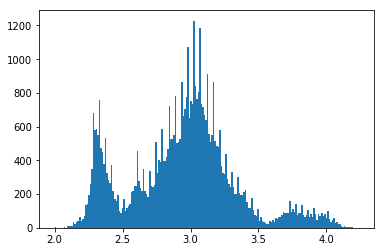

In [84]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline
data = pd.read_excel (r'reading_all.xlsx') 
df= pd.DataFrame(data, columns=['PupilLeft','PupilRight'])
#df = pd.DataFrame(data, columns= ['PupilLeft','PupilRight'])
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True )

#df['PupilLeft'].str.replace(',','-')
pupilleft = df['PupilLeft']
pupilright = df['PupilRight']
for index, row in df.iterrows():
    print(row['PupilLeft'].replace(',','.'), row['PupilRight'].replace(',','.')) 
#val = df['PupilLeft'].values[0].replace(',','.')
#print('pupilleft '+val)
#pupilleft = pupilleft.str.replace(',','.')
#pupilright = pupilright.str.replace(',','.')
pupilleft = pupilleft.str.replace(',','.').astype(float)
pupilright = pupilright.str.replace(',','.').astype(float)
print(pupilleft)
print(pupilright)
pupilleft, pupilright = np.array(pupilleft), np.array(pupilright) 
mean = (pupilleft + pupilright)/2;

#pyplot.hist(pupilleft, bins=200)
#pyplot.hist(pupilright,bins=100)
#print (mean)
print("scanning histogram")
pyplot.hist(mean, bins=200)
pyplot.show()